In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Load Dataset

In [31]:
data = pd.read_csv("student_pass.csv")
data

,hours,pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [32]:
print(data.head())

   hours  pass
0      1     0
1      2     0
2      3     0
3      4     0
4      5     1


In [33]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hours   10 non-null     int64
 1   pass    10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes
None


In [ ]:
#EDA and Visualizations

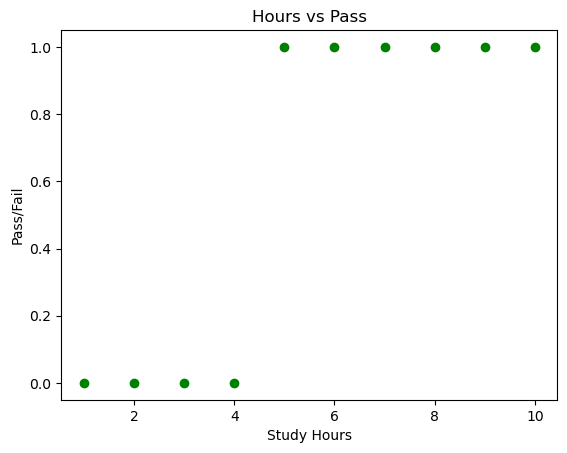

In [34]:
plt.scatter(data["hours"], data["pass"], color='green')
plt.xlabel("Study Hours")
plt.ylabel("Pass/Fail")
plt.title("Hours vs Pass")
plt.show()

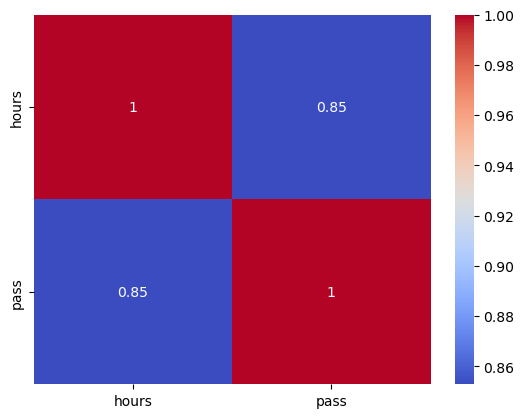

In [35]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

#Data Preprocessing

In [36]:
X = data[['hours']]
y = data['pass']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [37]:
X_train, X_test, y_train, y_test

(array([[ 0.17407766],
        [-1.5666989 ],
        [ 0.87038828],
        [-0.87038828],
        [ 1.5666989 ],
        [-0.17407766],
        [-0.52223297],
        [ 0.52223297]]),
 array([[ 1.21854359],
        [-1.21854359]]),
 5    1
 0    0
 7    1
 2    0
 9    1
 4    1
 3    0
 6    1
 Name: pass, dtype: int64,
 8    1
 1    0
 Name: pass, dtype: int64)

#Create Dictionary of Models

In [38]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

In [ ]:
#Train & Evaluate Models

#Find the best Model

In [40]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    results[name] = acc

    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, pred))


Logistic Regression
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


KNN
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Decision Tree
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00  

In [41]:
best_model = max(results.items(), key=lambda x: x[1])
print("\nBest Model is:", best_model)


Best Model is: ('Logistic Regression', 1.0)
